## 1.7 示例：随机漫步

从0开始，步长1和－1出现的概率相等。

下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步

In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

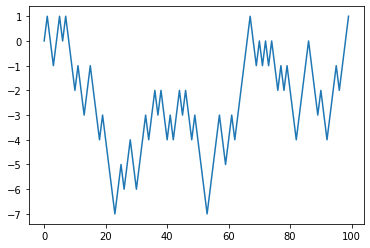

In [5]:
plt.plot(walk[:100])

我用np.random模块一次性随机产生1000个“掷硬币”结果（即两个数中任选一个），将其分别设置为1或－1，然后计算累计和：

In [6]:
import numpy as np

nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

print(walk.min())
print(walk.max())

-14
32


假设我们想要知道本次随机漫步需要多久才能距离初始0点至少10步远（任一方向均可）。np.abs(walk)>=10可以得到一个布尔型数组，它表示的是距离是否达到或超过10，而我们想要知道的是第一个10或－10的索引。可以用argmax来解决这个问题，它返回的是该布尔型数组第一个最大值的索引（True就是最大值）：

注意，这里使用argmax并不是很高效，因为它无论如何都会对数组进行完全扫描。在本例中，只要发现了一个True，那我们就知道它是个最大值了。

In [7]:
print((np.abs(walk) >= 10).argmax())

27


### 一次模拟多个随机漫步

如果你希望模拟多个随机漫步过程（比如5000个），只需对上面的代码做一点点修改即可生成所有的随机漫步过程。只要给numpy.random的函数传入一个二元元组就可以产生一个二维数组，然后我们就可以一次性计算5000个随机漫步过程（一行一个）的累计和了：

In [16]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
# steps = np.random.normal(loc=0, scale = 0.25, size=(nwalks, nsteps))
walks = steps.cumsum(1)

print(walks)

[[ 1  2  1 ... 16 15 16]
 [ 1  2  1 ... 12 13 12]
 [ 1  2  3 ... 20 21 22]
 ...
 [-1 -2 -1 ... 40 39 40]
 [ 1  0  1 ... 20 21 20]
 [ 1  0  1 ... -2 -3 -2]]


In [17]:
print(walks.max())
print(walks.min())

125
-140


得到这些数据之后，我们来计算30或－30的最小穿越时间。这里稍微复杂些，因为不是5000个过程都到达了30。我们可以用any方法来对此进行检查：

In [18]:
hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
print(hits30.sum())

[ True False  True ...  True False False]
3378


然后我们利用这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间：

In [19]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print(crossing_times.mean())

505.4772054470101
